# NP, NPC and the Cook Levin Theorem

In [70]:
%%html
<style>

.CodeMirror {
    width: 100vw;
}
S
.container {
    width: 99% !important;
}

.rendered_html {
  font-size:0.8em;
}
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}

</style>

Dependencies for this notebook: `graphviz` executable installed on the system and on the path, [networkx](https://anaconda.org/anaconda/networkx)   and [graphviz python](https://anaconda.org/conda-forge/python-graphviz) anaconda packages. (See [here](https://graphviz.readthedocs.io/en/stable/index.html) for the documentation of the latter package.)

Please run the utility code at the bottom of this notebook first.

You should be able to upload this notebook to the JupyterHub instance on canvas.

__comment:__ In this notebook I use `x_17` and not `x17` for 3SAT and 3NAND formula to be more consistent with our notation for NAND. This is of course not very important.

In [73]:
%run "NANDutils.ipynb"

Finished running utility code


 _Useful unicode symbols:_ φ   ∨   ∧   ¬   ≠    Ψ

__Announcements:__ level of description - see my last lecture

probability is coming...

In [3]:
%%html
<iframe src="http://free.timeanddate.com/countdown/i5vf6j5p/n43/cf11/cm0/cu4/ct1/cs1/ca0/co0/cr0/ss0/cac09f/cpc09f/pct/tcfff/fs100/szw576/szh243/iso2018-10-25T10:30:00" allowTransparency="true" frameborder="0" width="177" height="35"></iframe>'

In [4]:
# %pdb

In [5]:
last_time = Digraph()
last_time.edges([("3SAT","Quadratic Equations"),("3SAT","Independent Set"),("3SAT","Longest Path"),("Independent Set","Maximum Cut")])

today = Digraph()
today.edges([("3SAT","Quadratic Equations"),("3SAT","Independent Set"),("3SAT","Longest Path"),("Independent Set","Maximum Cut")])
today.edges([("Quadratic Equations","3SAT"),("Independent Set","3SAT"),("Longest Path","3SAT"),("Maximum Cut","3SAT")])

cooklevin = Digraph()
cooklevin.edges([("F in NP","NANDSAT"),("NANDSAT","3NAND"),("3NAND","3SAT")])

cooklevin1 = Digraph()
cooklevin1.edge("F in NP","NANDSAT",color="red",pendwidth="2")
cooklevin1.edges([("NANDSAT","3NAND"),("3NAND","3SAT")])

cooklevin2 = Digraph()
cooklevin2.edge("NANDSAT","3NAND",color="red",pendwidth="2")
cooklevin2.edges([("F in NP","NANDSAT"),("3NAND","3SAT")])

cooklevin3 = Digraph()
cooklevin3.edge("3NAND","3SAT",color="red",pendwidth="2")
cooklevin3.edges([("F in NP","NANDSAT"),("NANDSAT","3NAND")])

combined = Digraph()
combined.edges([("F in NP","NANDSAT"),("NANDSAT","3NAND"),("3NAND","3SAT"),("3SAT","Independent Set"),("Independent Set","Maximum Cut")])

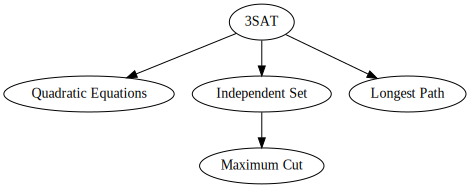

In [6]:
last_time

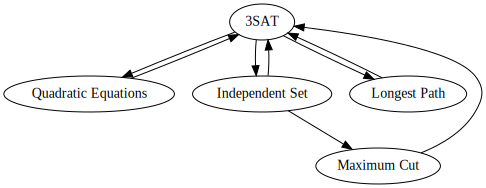

In [7]:
today

## The class $\mathbf{NP}$

"Efficiently verifiable problems"

__Def:__ $F \in \mathbf{NP}$ iff for all $x\in \{0,1\}^*$,

$$F(x)=1 \Leftrightarrow \exists y\in \{0,1\}^{p(n)} \text{s.t.} V(x,y)=1 $$

__Problem:__ Prove that $ISET \in \mathbf{NP}$

In [71]:
%%html
<iframe src="https://e.ggtimer.com/180" allowTransparency="true" frameborder="0" width="700" height="100"></iframe>

__Thm__ $\mathbf{P} \subseteq \mathbf{NP} \subseteq \mathbf{EXP}$

__Proof idea:__ $\mathbf{P} \subseteq \mathbf{NP}$ since can use empty solution.

$\mathbf{NP} \subseteq \mathbf{EXP}=TIME(2^{poly(n)})$ since can enumerate over all solutions.

__Question:__ Which of the following problems is __not__ in $\mathbf{NP}$?

__a__ $MAXCUT$

__b__ $SHORTESTPATH$

__c__ $LONGESTPATH$

__d__ $HALT_{2^{2^n}}$

In [9]:
%%html
<iframe src="https://e.ggtimer.com/120" allowTransparency="true" frameborder="0" width="700" height="100"></iframe>

__Def:__ $G$ is _$\mathbf{NP}$-complete_ if $G\in\mathbf{NP}$ and  $\forall F\in \mathbf{NP}$, $F \leq_p G$

__Cook-Levin Theorem:__ $3SAT$ is $\mathbf{NP}$ complete

__History:__ 

* 1971: Steve Cook proves CLT. (SAT for general formulas)
* 1972: Dick Karp gives first taste of reach of $\mathbf{NP}$-completeness: 21 natural examples.
* 1971-3: Across iron curtain Leonid Levin proves CLT and gives 6 $\mathbf{NP}$-completeness results

![](karp_abstract.png)

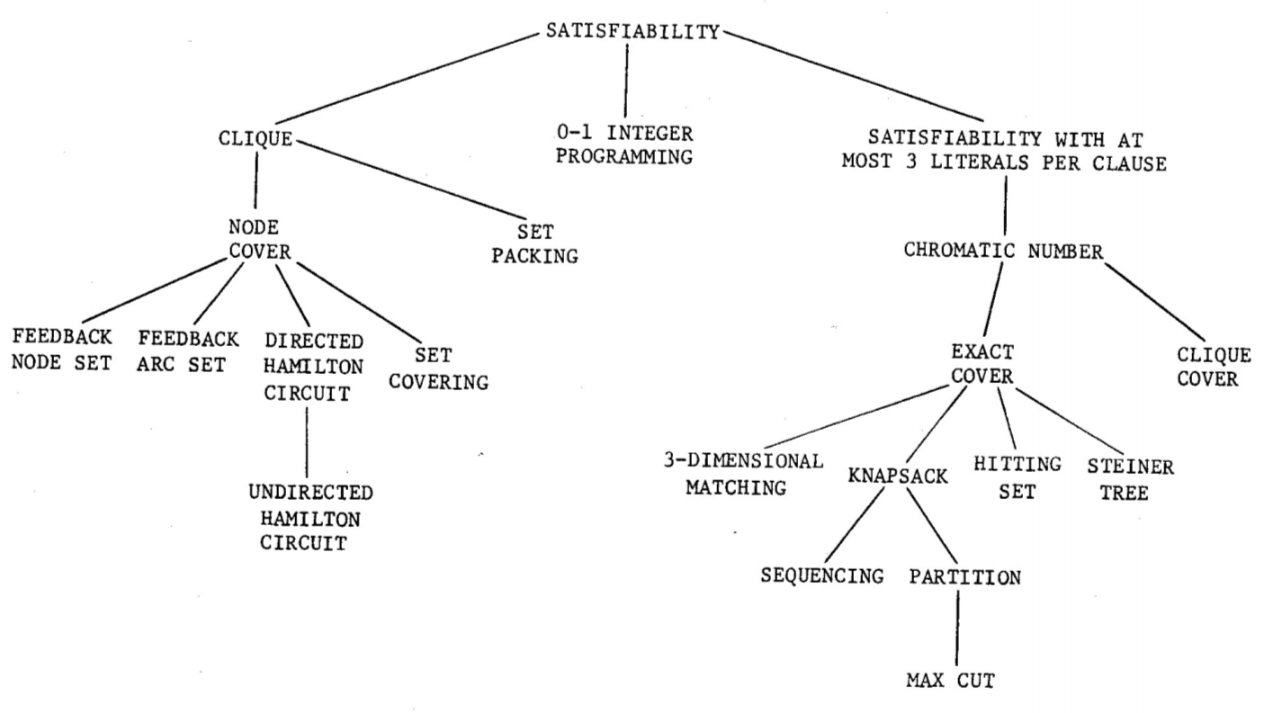

In [10]:
Image('karp_problems.png')

## Karp's problems

* CNF Satisfiability / 3SAT
* Clique  (independent Set)
* Max cut / partition
* Integer programming
* Set cover / hitting set / exact cover/ clique cover
* Vertex cover
* Feedback node set, feedback arc set
* (un)directed Hamiltonian cycle 
* Graph coloring
* Steiner tree
* Subset sum (knapsack) / set packing
* 3-dimensional matching
* Job sequencing

![](npreductions.png)

![](compendium.png)

![](npcompletexkcd.png)

__Cook Levin Thm:__ For every $F\in\mathbf{NP}$, $F \leq 3SAT$

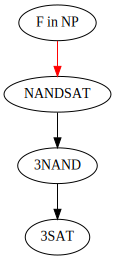

In [11]:
cooklevin1

## NANDSAT

__Input:__ $Q \in \{0,1\}^*$: NAND program of $n$ inputs and $1$ output

__Output:__ $1$ iff $\exists y\in \{0,1\}^n$ s.t. $Q(y)=1$.

__Problem:__ Prove that $NANDSAT \in \mathbf{NP}$

In [12]:
xor5 = r'''
u   =  NAND(X[0],X[1])
v   = NAND( X[0] , u)
w   = NAND( X[1] , u)
s   = NAND( v   , w)
u   = NAND( s   , X[2])
v   = NAND( s   , u)
w   = NAND( X[2] , u)
s   = NAND( v   , w)
u   = NAND( s   , X[3])
v   = NAND( s   , u)
w   = NAND( X[3] , u)
s   = NAND( v   , w)
u   = NAND( s   , X[4])
v   = NAND( s   , u)
w   = NAND( X[4] , u)
Y[0] = NAND( v   , w)
'''[1:]

In [13]:
print(xor5)

u   =  NAND(X[0],X[1])
v   = NAND( X[0] , u)
w   = NAND( X[1] , u)
s   = NAND( v   , w)
u   = NAND( s   , X[2])
v   = NAND( s   , u)
w   = NAND( X[2] , u)
s   = NAND( v   , w)
u   = NAND( s   , X[3])
v   = NAND( s   , u)
w   = NAND( X[3] , u)
s   = NAND( v   , w)
u   = NAND( s   , X[4])
v   = NAND( s   , u)
w   = NAND( X[4] , u)
Y[0] = NAND( v   , w)



In [14]:
EVAL(xor5,[1,0,1,0,1])

[1]

In [15]:
and5 = r'''
tmp = NAND( X[0] , X[1])
s   = NAND( tmp , tmp)
tmp = NAND( X[2] , s)
s   = NAND( tmp , tmp)
tmp = NAND( X[3] , s)
s   = NAND( tmp , tmp)
tmp = NAND( X[4] , s)
Y[0] = NAND( tmp , tmp)
'''[1:]

In [16]:
EVAL(and5,[1,1,1,1,1])

[1]

__Thm:__ $\forall F \in \mathbf{NP}$, $F \leq_p NANDSAT$

__Proof idea:__ $TIME(T(n)) \subseteq TIME_{++}(T(n)^{O(1)}) \subseteq SIZE(T(n)^{O(1)})$

__Proof:__ Let $F \in \mathbf{NP}$ and $V$  NAND++ program that runs in time at most $T$ such that 
$$\forall x\in \{0,1\}^n, F(x)=1 \Leftrightarrow \exists_{w\in \{0,1\}^m} V(xw)=1$$

Find $O(T(n))$ sized NAND $Q$  computing $w \mapsto V(xw)$

$NANDSAT(Q) = F(x)$

In [17]:
CONSTPREFIX = r'''
temp = NAND(X[0],X[0])
one = NAND(X[0],temp)
zero = NAND(one,one)
'''[1:]

In [18]:
def unroll__(P,n,m,T):
    result = CONSTPREFIX
    for t in range(T // P.count('\n')):
        i = indexat(t) # value of i in T-th iteration
        valid = ('one' if i < n else 'zero' )
        inp   = ('X[i]' if i < n else 'zero')
        out   = ('Y[i]' if i < m else 'nonsense')
        result += P.replace('Xvalid[i]',valid).replace('X[i]',inp
                           ).replace('Y[i]',out).replace('[i]',f'[{i}]')
    return result

In [19]:
# "hardwire" an input x to a NAND program Q
# return Q' s.t. Q'(y)=Q(xy)
def hardwire(Q,x):
    n = len(x)

    for i in range(n): 
        Q = Q.replace(f'X[{i}]',('one' if x[i] else 'zero'))
    
    # move x_n,x_n+1,.... to x_0,x_1,...
    for i in range(n,2*len(Q)): 
        Q = Q.replace(f'X[{i}]',f'X[{i-n}]')
    
    return CONSTPREFIX+Q

In [20]:
Q = hardwire(xor5,[1,0,1])
print(Q)

temp = NAND(X[0],X[0])
one = NAND(X[0],temp)
zero = NAND(one,one)
u   =  NAND(one,zero)
v   = NAND( one , u)
w   = NAND( zero , u)
s   = NAND( v   , w)
u   = NAND( s   , one)
v   = NAND( s   , u)
w   = NAND( one , u)
s   = NAND( v   , w)
u   = NAND( s   , X[0])
v   = NAND( s   , u)
w   = NAND( X[0] , u)
s   = NAND( v   , w)
u   = NAND( s   , X[1])
v   = NAND( s   , u)
w   = NAND( X[1] , u)
Y[0] = NAND( v   , w)



In [21]:
EVAL(Q,[1,0])

[1]

### Heart of the Cook Levin Theorem

__Input:__ NAND++ program $V$, string $x\in \{0,1\}^n$, some parameter $m=an^b$, bound $T$ on running time.

__Output:__ Circuit/NAND prog $Q$ mapping $\{0,1\}^m \rightarrow \{0,1\}$ such that $Q(w)=V(xw)$ for every $w\in \{0,1\}^m$.

In [22]:
# reduce F in NP to NANDSAT
# Input: x,T and and a NAND++ prog P s.t. 
#       F(x)=1 iff there exists y in {0,1}^m s.t. P(xy)=1 within T steps
# Output: Q s.t. NANDSAT(Q)=F(x)
def NP2NANDSAT_(f,T,m,x):
    Q = unroll__(f,len(x)+m,1,T)
    return hardwire(Q,x)

In [23]:
# This is the version of the function above that keeps track of y
# if it is given as extra input. Otherwise behaves identically.
#
# reduce F in NP to NANDSAT
# Input: x,T and and a NAND++ prog P s.t. 
#       F(x)=1 iff there exists y in {0,1}^m s.t. P(xy)=1 within T steps
# Output: Q s.t. NANDSAT(Q)=F(x)
def NP2NANDSAT(f,T,m,x,y=[]):
    if y and len(y) != m: raise Exception
    Q = unroll__(f,len(x)+m,1,T)
    Q = hardwire(Q,x)
    return (Q,y) if y else Q

In [24]:
def EVALPPCODE(prog,x):
    stepcounter = 0
    vtable = defaultdict(int)
    for i in range(len(x)):
        vtable[f"X[{i}]"]=x[i]
        vtable[f"Xvalid[{i}]"]=1
    for i in index():
        P = prog.replace("[i]",f"[{i}]")
        for line in P.split('\n'):
            if not line.strip(): continue
            stepcounter += 1
            foo,bar,blah = splitline(line)
            vtable[foo] =  1-vtable[bar]*vtable[blah]
        if not vtable["loop"]: break
    j = 0
    res = []
    while vtable[f"Yvalid[{j}]"]:
        res.append(vtable[f"Y[{j}]"])
        j+= 1
    print(f"{stepcounter} steps")
    return res

            
        

In [25]:
@nandpp
def ANDPP():
    Y[0] = IF(Yvalid[0],Y[0],one(X[0]))
    Yvalid[0] = one(X[0])
    ignore = OR(Visited[i],NOT(Xvalid[i]))
    Y[0] = AND(OR(ignore,X[i]),Y[0])
    Visited[i] = one(X[0])
    loop = COPY(Xvalid[i])

In [26]:
ANDPP([1,1,1,1])

[1]

In [27]:
time(ANDPP,[1,1,1,1])

357

In [28]:
    
andpp = NANDPPcode(ANDPP)
print(andpp)

temp_0 = NAND(X[0],X[0])
temp_1 = NAND(X[0],temp_0)
temp_2 = NAND(Yvalid[0],Yvalid[0])
temp_3 = NAND(temp_1,temp_2)
temp_4 = NAND(Y[0],Yvalid[0])
Y[0] = NAND(temp_3,temp_4)
temp_6 = NAND(X[0],X[0])
Yvalid[0] = NAND(X[0],temp_6)
temp_8 = NAND(Xvalid[i],Xvalid[i])
temp_9 = NAND(Visited[i],Visited[i])
temp_10 = NAND(temp_8,temp_8)
ignore = NAND(temp_9,temp_10)
temp_12 = NAND(ignore,ignore)
temp_13 = NAND(X[i],X[i])
temp_14 = NAND(temp_12,temp_13)
temp_15 = NAND(temp_14,Y[0])
Y[0] = NAND(temp_15,temp_15)
temp_17 = NAND(X[0],X[0])
Visited[i] = NAND(X[0],temp_17)
temp_19 = NAND(Xvalid[i],Xvalid[i])
loop = NAND(temp_19,temp_19)



In [29]:
andpp = r'''
notx0 = NAND(X[0],X[0])
one= NAND(X[0],notx0)
temp_2 = NAND(Yvalid[0],Yvalid[0])
temp_3 = NAND(one,temp_2)
temp_4 = NAND(Y[0],Yvalid[0])
Y[0] = NAND(temp_3,temp_4)
Yvalid[0] = NAND(X[0],notx0)
temp_9 = NAND(Visited[i],Visited[i])
ignore = NAND(temp_9,Xvalid[i])
temp_12 = NAND(ignore,ignore)
temp_13 = NAND(X[i],X[i])
temp_14 = NAND(temp_12,temp_13)
temp_15 = NAND(temp_14,Y[0])
Y[0] = NAND(temp_15,temp_15)
Visited[i] = NAND(X[0],notx0)
temp_19 = NAND(Xvalid[i],Xvalid[i])
loop = NAND(temp_19,temp_19)
'''[1:]

In [30]:
EVALPPCODE(andpp,[1,1,1])

170 steps


[1]

In [31]:
EVALPPCODE(andpp,[1,1,1,1,1])

442 steps


[1]

448


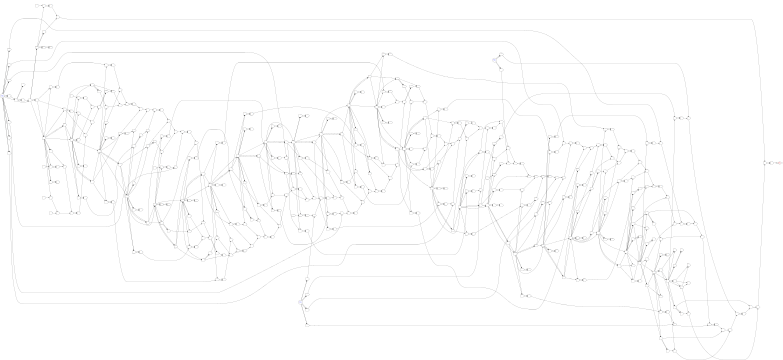

In [76]:
Q = NP2NANDSAT(andpp,442,3,[1,1])
print(Q.count("\n"))
code2circuit(Q,pruneit=False)

In [34]:
EVAL(Q,[1,1,1])

[1]

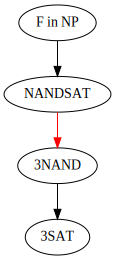

In [35]:
cooklevin2

## 3NAND

__Input:__ $\psi \in \{0,1\}^*$ representing 3NAND formula of form $(x_i = x_j NAND x_k) \wedge \cdots$

__Output:__ $1$ iff $\exists x\in \{0,1\}^*$ s.t. $\psi(x)=1$. 

In [36]:
Ψ = "(z0 = NAND(z2,z3) ) ∧ (z3 = NAND(z2,z1) ) ∧ (z1 = NAND(z2,z3) ) "

In [37]:
# Evaluate 3CNAND Ψ on assignment x 
# Both are represented as strings
def eval3NAND(Ψ,x):

    def varval(v):
        return  int(x[int(v[1:])]) # assume vars are x_###
    
    for (v0,v1,v2) in getnandclauses(Ψ):
        if  varval(v0) != 1-varval(v1)*varval(v2): return False
    
    return True


In [38]:

# Clause list of a 3CNF/3NAND formula  φ
def getcnfclauses(φ):
    clauses =  φ.split("∧")
    res = []
    for c in clauses:
        (v0,_,v1,_,v2) = c.strip()[1:-1].split()
        res.append((v0.strip(),v1.strip(),v2.strip()))
    return res

def getnandclauses(φ):
    clauses =  φ.split("∧")
    res = []
    for c in clauses:
        foo,bar,blah, = filter(None,re.split('\s*=\s*NAND\s*\(\s*|\s*\,\s*|\s*\)\s*|\s+',c.strip()[1:-1]))
        res.append((foo.strip(),bar.strip(),blah.strip()))
    return res



# number of variables of a formula φ
def numvars(φ):
    for n in range(len(φ)-1,0,-1):
        if φ.find(f'x{n}')>= 0 or φ.find(f'z{n}')>= 0: return n+1
    raise Exception


In [39]:
getnandclauses(Ψ)

[('z0', 'z2', 'z3'), ('z3', 'z2', 'z1'), ('z1', 'z2', 'z3')]

__Thm:__ $NANDSAT \leq_p 3NAND$

__Proof:__ Variables $z_0,\ldots,z_{n-1}$ for inputs. Variables $z_n,\ldots, z_{n+m-1}$ for lines.

Line `foo = NAND(bar, blah)` mapped to $z_i = NAND(z_j, z_k)$

In [40]:
# Reduce NANDSAT to 3NAND
# Input: NAND prog Q
# Output: 3NAND formula Ψ
#        s.t. Ψ satisfiable iff Q is
def NANDSAT23NAND_(Q):
    Q = CONSTPREFIX + Q
    n, _  = numinout(Q)
    Ψ = ''

    #varidx[u] is n+line where u is last written to
    varidx = defaultdict(lambda : n+ 2) # line 2 corresponds to zero
    
    for i in range(n): varidx[f'X[{i}]'] = i # setup x_0...x_n-1
    
    j = n
    for line in Q.split('\n'):
        if not line.strip(): continue
        foo,bar,blah = splitline(line) # split "foo = NAND(bar,blah)"
        Ψ +=  f"(z{j} = NAND(z{varidx[bar]},z{varidx[blah]}) ) ∧ "
        varidx[foo] = j
        j += 1
    Ψ += f"(z{varidx['Y[0]']} = NAND(z{varidx['zero']},z{varidx['zero']}) )"
    return Ψ

In [41]:
# Version of input above that keeps track of satisfying assignment y if given
#
# Reduce NANDSAT to 3NAND
# Input: NAND prog Q
# Output: 3NAND formula Ψ
#        s.t. Ψ satisfiable iff Q is
def NANDSAT23NAND(Q,y=[]):
    Q = CONSTPREFIX + Q
    n, _  = numinout(Q)
    Ψ = ''
    z = defaultdict(int)

    #varidx[u] is n+line where u is last written to
    varidx = defaultdict(lambda : n+ 2) # line 2 corresponds to zero

    for i in range(n): 
        varidx[f'X[{i}]'] = i # setup x_0...x_n-1
        if y: z[i] = y[i]
    
    j = n
    for line in Q.split('\n'):
        if not line.strip(): continue
        foo,bar,blah = splitline(line)
        Ψ +=  f"(z{j} = NAND(z{varidx[bar]},z{varidx[blah]}) ) ∧ "
        if y: z[j] = NAND(z[varidx[bar]],z[varidx[blah]])
        varidx[foo] = j
        j += 1
    Ψ += f"(z{varidx['Y[0]']} = NAND(z{varidx['zero']},z{varidx['zero']}) )"
    return Ψ if not y else (Ψ,[z[i] for i in range(j)])

In [42]:
print(xor5) 
lines = xor5.count('\n')
n = max([i for i in range(2*lines) if xor5.find(f"X[{i}]")>=0])+1
print(f"Number of lines: {lines}, Number of variables: {n}")

u   =  NAND(X[0],X[1])
v   = NAND( X[0] , u)
w   = NAND( X[1] , u)
s   = NAND( v   , w)
u   = NAND( s   , X[2])
v   = NAND( s   , u)
w   = NAND( X[2] , u)
s   = NAND( v   , w)
u   = NAND( s   , X[3])
v   = NAND( s   , u)
w   = NAND( X[3] , u)
s   = NAND( v   , w)
u   = NAND( s   , X[4])
v   = NAND( s   , u)
w   = NAND( X[4] , u)
Y[0] = NAND( v   , w)

Number of lines: 16, Number of variables: 5


In [43]:
Ψ = NANDSAT23NAND_(xor5)
print(Ψ)
print(f"Vars: {numvars(Ψ)}, Clauses: {len(getnandclauses(Ψ))}")

(z5 = NAND(z0,z0) ) ∧ (z6 = NAND(z0,z5) ) ∧ (z7 = NAND(z6,z6) ) ∧ (z8 = NAND(z0,z1) ) ∧ (z9 = NAND(z0,z8) ) ∧ (z10 = NAND(z1,z8) ) ∧ (z11 = NAND(z9,z10) ) ∧ (z12 = NAND(z11,z2) ) ∧ (z13 = NAND(z11,z12) ) ∧ (z14 = NAND(z2,z12) ) ∧ (z15 = NAND(z13,z14) ) ∧ (z16 = NAND(z15,z3) ) ∧ (z17 = NAND(z15,z16) ) ∧ (z18 = NAND(z3,z16) ) ∧ (z19 = NAND(z17,z18) ) ∧ (z20 = NAND(z19,z4) ) ∧ (z21 = NAND(z19,z20) ) ∧ (z22 = NAND(z4,z20) ) ∧ (z23 = NAND(z21,z22) ) ∧ (z23 = NAND(z7,z7) )
Vars: 24, Clauses: 20


In [44]:
NANDSAT23NAND(xor5,[1,0,0,1,1])[1]

[1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1]

In [45]:
eval3NAND(NANDSAT23NAND_(xor5),[1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])

True

In [46]:
Q = hardwire(xor5,[1,1])
(Ψ,y) = NANDSAT23NAND(Q,[1,1,1])
eval3NAND(Ψ,y)

True

In [47]:
Ψ = NANDSAT23NAND(NP2NANDSAT(andpp,442,3,[1,1]))
print(Ψ)

(z3 = NAND(z0,z0) ) ∧ (z4 = NAND(z0,z3) ) ∧ (z5 = NAND(z4,z4) ) ∧ (z6 = NAND(z0,z0) ) ∧ (z7 = NAND(z0,z6) ) ∧ (z8 = NAND(z7,z7) ) ∧ (z9 = NAND(z7,z7) ) ∧ (z10 = NAND(z7,z9) ) ∧ (z11 = NAND(z10,z10) ) ∧ (z12 = NAND(z10,z10) ) ∧ (z13 = NAND(z10,z12) ) ∧ (z14 = NAND(z5,z5) ) ∧ (z15 = NAND(z13,z14) ) ∧ (z16 = NAND(z5,z5) ) ∧ (z17 = NAND(z15,z16) ) ∧ (z18 = NAND(z13,z12) ) ∧ (z19 = NAND(z5,z5) ) ∧ (z20 = NAND(z19,z13) ) ∧ (z21 = NAND(z20,z20) ) ∧ (z22 = NAND(z13,z13) ) ∧ (z23 = NAND(z21,z22) ) ∧ (z24 = NAND(z23,z17) ) ∧ (z25 = NAND(z24,z24) ) ∧ (z26 = NAND(z13,z12) ) ∧ (z27 = NAND(z13,z13) ) ∧ (z28 = NAND(z27,z27) ) ∧ (z29 = NAND(z13,z13) ) ∧ (z30 = NAND(z13,z29) ) ∧ (z31 = NAND(z18,z18) ) ∧ (z32 = NAND(z30,z31) ) ∧ (z33 = NAND(z25,z18) ) ∧ (z34 = NAND(z32,z33) ) ∧ (z35 = NAND(z30,z29) ) ∧ (z36 = NAND(z5,z5) ) ∧ (z37 = NAND(z36,z30) ) ∧ (z38 = NAND(z37,z37) ) ∧ (z39 = NAND(z30,z30) ) ∧ (z40 = NAND(z38,z39) ) ∧ (z41 = NAND(z40,z34) ) ∧ (z42 = NAND(z41,z41) ) ∧ (z43 = NAND(z30,z29) ) ∧ (z44 =

In [48]:
assign = NANDSAT23NAND(*NP2NANDSAT(andpp,442,3,[1,1],[1,0,1]))[1]
print(assign)
print(eval3NAND(Ψ,assign))

[1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 

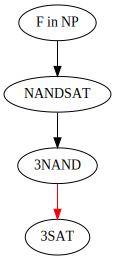

In [49]:
cooklevin3

## 3SAT 

__Input:__ 3CNF formula:  AND of $m$ _clauses_.   Clause = OR of three _literals_. Literal = variable or its negation.

__Goal:__ Output 1 iif formula _satisfiable_.

In [50]:
φ = "(x0 ∨ ¬x3 ∨ x2 ) ∧ (¬x0 ∨ x1 ∨ ¬x2 ) ∧ (x1 ∨ x2 ∨ ¬x3 )  "

In [51]:
# Evaluate 3CNF φ on assignment x 
# Both are represented as strings
def evalcnf(φ,x):

    def varval(v):
        return (1-x[int(v[2:])])  if v[0]=="¬" else x[int(v[1:])]
    
    for (v0,v1,v2) in getcnfclauses(φ):
        # print(c+str([varval(v0),varval(v1),varval(v2)]))
        if not varval(v0)+varval(v1)+varval(v2): return False
    
    return True

# Clause list of a 3CNF φ
def getcnfclauses(φ):
    clauses =  φ.split("∧")
    res = []
    for c in clauses:
        (v0,_,v1,_,v2) = c.strip()[1:-1].split()
        res.append((v0.strip(),v1.strip(),v2.strip()))
    return res

In [52]:
numvars(φ)

4

__Thm:__ $3NAND \leq_p 3SAT$

__Proof:__ $a = NAND(b,c)$   iff  $(\neg a \vee \neg b \vee \neg c) \wedge (a \vee b) \wedge (a \vee c)$

In [53]:
# Reduce 3NAND to 3SAT
# Input: 3NAND formula Ψ
# Output: 3CNF formula φ
#        s.t.  φ satisfiable iff Ψ is
def NAND23SAT_(Ψ):
    φ = ""
    for (a,b,c) in getnandclauses(Ψ):
        φ += f'(¬{a} ∨ ¬{b} ∨ ¬{c}) ∧ ({a} ∨ {b}  ∨ {b}) ∧ ({a}  ∨  {c} ∨ {c}) ∧ '
    return φ[:-3] # chop off redundant ∧

In [54]:
Ψ = "(x0 = NAND(x2,x3) ) ∧ (x3 = NAND(x2,x1) ) ∧ (x1 = NAND(x2,x3) ) "
NAND23SAT_(Ψ)

'(¬x0 ∨ ¬x2 ∨ ¬x3) ∧ (x0 ∨ x2  ∨ x2) ∧ (x0  ∨  x3 ∨ x3) ∧ (¬x3 ∨ ¬x2 ∨ ¬x1) ∧ (x3 ∨ x2  ∨ x2) ∧ (x3  ∨  x1 ∨ x1) ∧ (¬x1 ∨ ¬x2 ∨ ¬x3) ∧ (x1 ∨ x2  ∨ x2) ∧ (x1  ∨  x3 ∨ x3)'

In [55]:
# Same as above but keeping track of assignment
def NAND23SAT(Ψ,y=[]):
    φ = ""
    def makex(a): return "x"+a[1:]
    for (a,b,c) in getnandclauses(Ψ):
        a = makex(a)
        b = makex(b)
        c = makex(c)
        φ += f'(¬{a} ∨ ¬{b} ∨ ¬{c}) ∧ ({a} ∨ {b}  ∨ {b}) ∧ ({a}  ∨  {c} ∨ {c}) ∧ '
    return (φ[:-3],y) if y else φ[:-3] # chop off redundant ∧

In [56]:
φ = NAND23SAT(NANDSAT23NAND(NP2NANDSAT(andpp,442,3,[1,1])))
print(φ)

(¬x3 ∨ ¬x0 ∨ ¬x0) ∧ (x3 ∨ x0  ∨ x0) ∧ (x3  ∨  x0 ∨ x0) ∧ (¬x4 ∨ ¬x0 ∨ ¬x3) ∧ (x4 ∨ x0  ∨ x0) ∧ (x4  ∨  x3 ∨ x3) ∧ (¬x5 ∨ ¬x4 ∨ ¬x4) ∧ (x5 ∨ x4  ∨ x4) ∧ (x5  ∨  x4 ∨ x4) ∧ (¬x6 ∨ ¬x0 ∨ ¬x0) ∧ (x6 ∨ x0  ∨ x0) ∧ (x6  ∨  x0 ∨ x0) ∧ (¬x7 ∨ ¬x0 ∨ ¬x6) ∧ (x7 ∨ x0  ∨ x0) ∧ (x7  ∨  x6 ∨ x6) ∧ (¬x8 ∨ ¬x7 ∨ ¬x7) ∧ (x8 ∨ x7  ∨ x7) ∧ (x8  ∨  x7 ∨ x7) ∧ (¬x9 ∨ ¬x7 ∨ ¬x7) ∧ (x9 ∨ x7  ∨ x7) ∧ (x9  ∨  x7 ∨ x7) ∧ (¬x10 ∨ ¬x7 ∨ ¬x9) ∧ (x10 ∨ x7  ∨ x7) ∧ (x10  ∨  x9 ∨ x9) ∧ (¬x11 ∨ ¬x10 ∨ ¬x10) ∧ (x11 ∨ x10  ∨ x10) ∧ (x11  ∨  x10 ∨ x10) ∧ (¬x12 ∨ ¬x10 ∨ ¬x10) ∧ (x12 ∨ x10  ∨ x10) ∧ (x12  ∨  x10 ∨ x10) ∧ (¬x13 ∨ ¬x10 ∨ ¬x12) ∧ (x13 ∨ x10  ∨ x10) ∧ (x13  ∨  x12 ∨ x12) ∧ (¬x14 ∨ ¬x5 ∨ ¬x5) ∧ (x14 ∨ x5  ∨ x5) ∧ (x14  ∨  x5 ∨ x5) ∧ (¬x15 ∨ ¬x13 ∨ ¬x14) ∧ (x15 ∨ x13  ∨ x13) ∧ (x15  ∨  x14 ∨ x14) ∧ (¬x16 ∨ ¬x5 ∨ ¬x5) ∧ (x16 ∨ x5  ∨ x5) ∧ (x16  ∨  x5 ∨ x5) ∧ (¬x17 ∨ ¬x15 ∨ ¬x16) ∧ (x17 ∨ x15  ∨ x15) ∧ (x17  ∨  x16 ∨ x16) ∧ (¬x18 ∨ ¬x13 ∨ ¬x12) ∧ (x18 ∨ x13  ∨ x13) ∧ (x18  ∨  x12 ∨ x12) ∧ (¬x19 ∨ ¬x5 ∨ ¬x5) ∧ (x19

In [57]:
a = NAND23SAT(*NANDSAT23NAND(*NP2NANDSAT(andpp,442,3,[1,1],[1,1,1])))[1]
print(evalcnf(φ,a))
print(assign)

True
[1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0

In [58]:
# Reduction φ ↦ G
def SAT2IS_(φ):
    n = numvars(φ) 
    G =Graph(engine='neato')
    
    # add pairs "x_i=0" and "x_i=1"
    for i in range(n): G.edge(f'x_{i}=0',f'x_{i}=1')
        
    # map "x_7" with index 5 to "5)x_7≠0", "¬x_12" with index 6 to "6)x_12≠1"
    def nodename(v,c): return str(c)+')'+(v[1:]+"≠1" if v[0]=="¬" else v+"≠0")
    
    #map "5)x_7≠0" to its neighbor "x_7=0"
    def neighbor(n):   return n.split(')')[1].split('≠')[0]+"="+n[-1]
    
    c = 0
    for C in getclauses(φ):
        (u,v,w) = (nodename(C[0],c),nodename(C[1],c+1),nodename(C[2],c+2))
        
        # add triangle of clause
        G.edges([(u,v),(v,w),(u,w)])
        
        # connect each vertex to inconsistent neighbor
        G.edges([(u,neighbor(u)),(v,neighbor(v)),(w,neighbor(w))])
        c += 3
    
    return G

In [59]:
# same reduction but taking care of colors and keeping track what happens to an assignment
def SAT2IS(φ,x=""):
    S = []
#    G.node(u,style='filled',fillcolor=('red' if x and x[i]=="0" else 'green'))
        
    n = numvars(φ) 
    G =Graph() # (engine='neato')
    
    def nname(c,v): return f"({c},{v})"
    
    c = 0
    nodes = {}
    for i in range(n):
        nodes["x"+str(i)] = []
        nodes["¬x"+str(i)] = []
    
    for C in getclauses(φ):
        sat = False
        for u in C: 
            if x and (not sat) and (((u[0]=="¬") and (x[int(u[2:])]=="0")) or ((u[0]!="¬") and (x[int(u[1:])]=="1"))):
                G.node(nname(c,u),f"{c},{subscript(u)}",fontsize="10",style='filled',fillcolor='green')
                S.append(nname(c,u))
                sat = True
            else:
                G.node(nname(c,u),f"{c},{subscript(u)}",fontsize="10")
            negu = u[1:] if u[0]=="¬" else "¬"+u
            for v in nodes[negu]: G.edge(nname(c,u),v,color="red") 
            nodes[u].append(nname(c,u))
        G.edges([[nname(c,C[0]), nname(c,C[1])],[nname(c,C[1]), nname(c,C[2])],[nname(c,C[0]), nname(c,C[2])]])
        c += 1
    
    return (scale(G) if not x else (scale(G),S))

In [60]:
# same reduction as above but handling colors and showing the resulting cut when the original graph has independent set
def IS2MAXCUT(G,I=[]):
    G =nxgraph(G)
    S = []
    H =Graph() # engine='sfdp')
    H.node("source",style='filled',fillcolor='blue')
    S.append("source")
    for v in G.nodes():
        color = ('red' if I and v in I else 'lightblue')
        H.node(v,label=subscript(v),fontsize="10",style='filled',fillcolor=color, shape="square")
        ecol = 'black'
        pwidth = '1'
        if I and v in I: 
            S.append(v)
            ecol = 'red'
            pwidth = '2'
        H.edge("source",v,color=ecol,penwidth=pwidth)  # len="2"
    
    j =0
    for (u,v) in G.edges():
        g1 = "e"+str(j)+"a"
        g2 = "e"+str(j)+"b"
        c1 = 'green'
        c2 = 'green'
        if I and (not u in I):
            c1 = 'red'
            S.append(g1)
        if I and (not v in I):
            c2 = 'red'
            S.append(g2)
        gadget = Graph("gadget"+str(j))
        gadget.node(g1,subscript("e0"),fontsize="10",style='filled',fillcolor=c1)
        gadget.node(g2,subscript("e1"),fontsize="10",style='filled',fillcolor=c2)
        gadget.edge(g1,g2,color=('red' if (g1 in S) != (g2 in I) else 'black'), penwidth=('2' if (g1 in S) != (g2 in I) else '1')) # len="1"
        gadget.edge(u,g1, color=('red' if (g1 in S) != (u in I) else 'black'),penwidth =('2' if (g1 in S) != (u in S) else '1')  ) # len="1"
        gadget.edge(v,g2, color=('red' if (g2 in S) != (v in I) else 'black'),penwidth= ('2' if (g2 in S) != (v in S) else '1') ) # len="1"
        
        H.subgraph(gadget)
        H.edge(g1,"source",color=('red' if (g1 in S)  else 'black'),penwidth=('2' if (g1 in S)  else '1')) # len="2.5"
        H.edge(g2,"source",color=('red' if (g2 in S)  else 'black'),penwidth= ('2' if (g2 in S)  else '1') )
        j +=1
        
    
    return (scale(H),S) if I else scale(H)

## Putting everything together

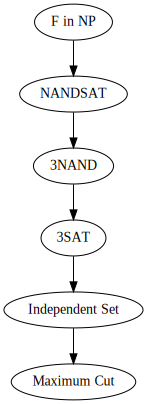

In [61]:
combined

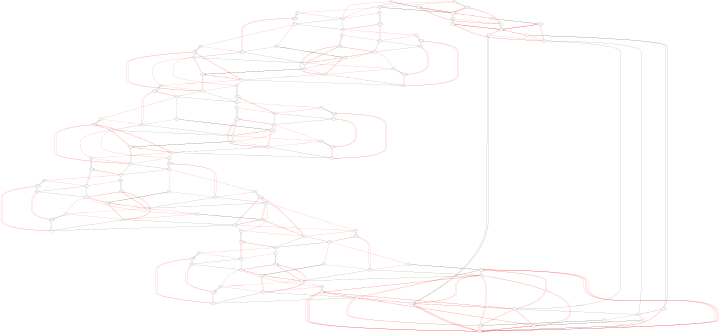

In [62]:
SAT2IS(*NAND23SAT(*NANDSAT23NAND(xor5,(1,0,1,0,1))))[0]

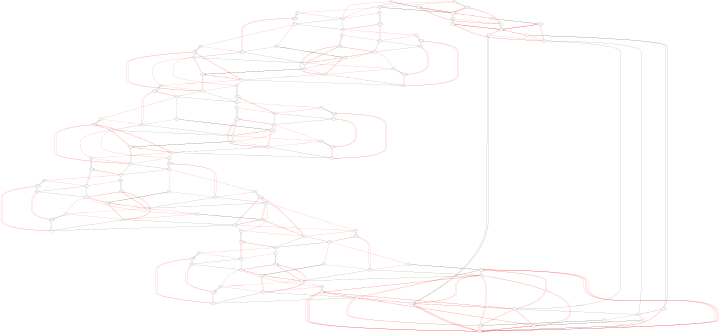

In [63]:
SAT2IS(NAND23SAT(NANDSAT23NAND(xor5)))

In [64]:
EVALPPCODE(andpp,[1,1,1])

170 steps


[1]

In [65]:
G = SAT2IS(NAND23SAT(NANDSAT23NAND(NP2NANDSAT(andpp,170,1,[1,1]))))

In [66]:
G

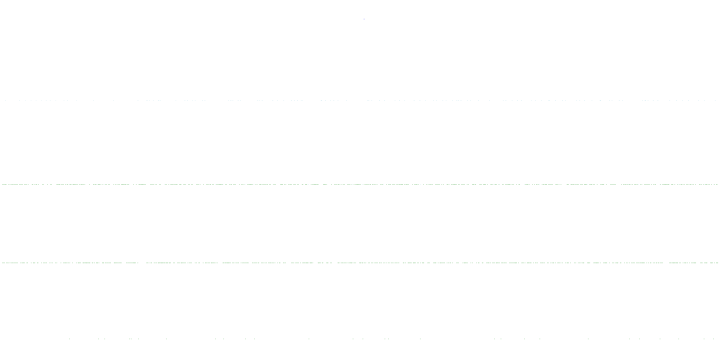

In [67]:
IS2MAXCUT(SAT2IS(NAND23SAT(NANDSAT23NAND(xor5))))

In [68]:
G = IS2MAXCUT(SAT2IS(NAND23SAT(NANDSAT23NAND(NP2NANDSAT(andpp,170,1,[1,1])))))

In [69]:
G.save("reductionoutput.gv")

'reductionoutput.gv'